In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("/dgx1nas1/storage/data/nmoshkov/DeepProfilerExperiments/bbbc022/data/BBBC022_MOA_MATCHES.csv")
df["Metadata_moa.x"] = df["Metadata_moa.x"].str.lower()
df

,Unnamed: 0,Var1,Metadata_moa.x,Metadata_Plate_Map_Name.x
0,0,BRD-A00993607-003-05-5,adrenergic receptor antagonist,H-BIOA-003-1
1,1,BRD-A01078468-001-05-6,synthetic estrogen,H-BIOA-003-1
2,2,BRD-A01295252-001-01-5,dopamine receptor ligand,H-BIOA-003-1
3,3,BRD-A01636364-003-05-2,sodium channel blocker,H-BIOA-003-1
4,4,BRD-A01643550-001-02-3,glucocorticoid receptor agonist,H-BIOA-006-1
...,...,...,...,...
1042,1042,BRD-K99121711-001-03-5,sodium channel blocker,H-BIOA-004-1
1043,1043,BRD-K99411983-001-02-3,"colchicine isomer, non-binder of microtubules",H-BIOA-004-1
1044,1044,BRD-K99586414-236-02-3,bacterial cell wall synthesis inhibitor,H-BIOA-005-1
1045,1045,BRD-K99792991-001-02-6,potassium channel activator,H-BIOA-006-1


In [3]:
len(df["Metadata_moa.x"].unique())

416

In [4]:
names = df["Metadata_moa.x"].str.split("|", expand=True)

In [5]:
all_names = []
for x in range(6):
    all_names += list(names[x].unique())
len(all_names)

483

In [6]:
all_names = [n for n in all_names if n is not None]
all_names = list(set(all_names))
len(all_names)

396

In [7]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [8]:
matrix = np.zeros((len(all_names), len(all_names)))
for i in range(len(all_names)):
    for j in range(i,len(all_names)):
        dist = levenshteinDistance(all_names[i], all_names[j])
        matrix[i,j] = dist
        matrix[j,i] = dist
        

/home/jupyter-jcaicedo@broadinst-d9764/.local/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jupyter-jcaicedo@broadinst-d9764/.local/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


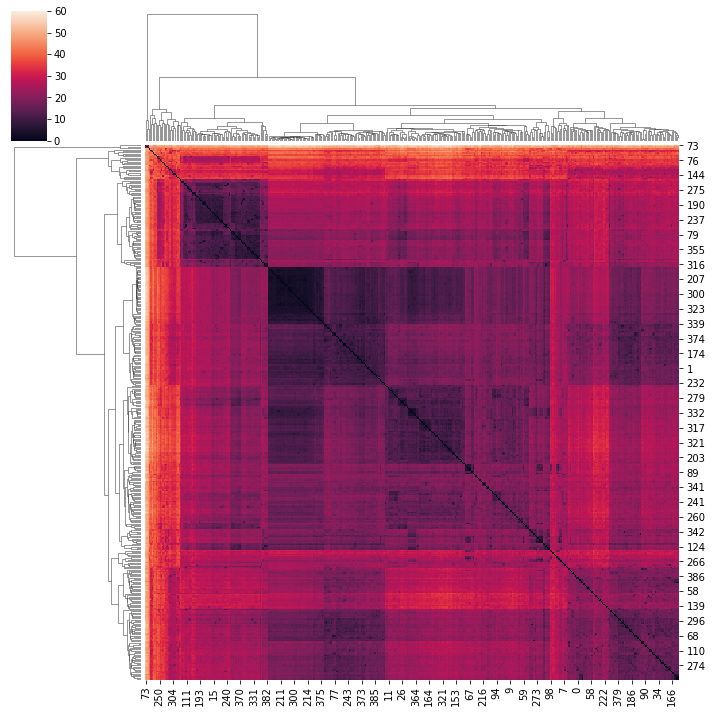

In [10]:
sb.clustermap(matrix)

In [11]:
rank = np.mean(matrix, axis=1)
rank = np.argsort(rank)

In [12]:
all_names[278], all_names[336], 

('thromboxane receptor antagonist', 'gap junction modulator')

In [13]:
sorted_names = [all_names[i] for i in rank]
sorted_names

['atpase inhibitor',
 'acat inhibitor',
 'aromatase inhibitor',
 'sirt inhibitor',
 'stat inhibitor',
 'chitin inhibitor',
 'calpain inhibitor',
 'dna inhibitor',
 'gat inhibitor',
 'mtor inhibitor',
 'parp inhibitor',
 'akt inhibitor',
 'ceramidase inhibitor',
 'prolactin inhibitor',
 'raf inhibitor',
 'hdac inhibitor',
 'reductase inhibitor',
 'camp inhibitor',
 't cell inhibitor',
 'src inhibitor',
 'nadph inhibitor',
 'pka inhibitor',
 'hsp inhibitor',
 'cathepsin inhibitor',
 'faah inhibitor',
 'mek inhibitor',
 'glutamate inhibitor',
 'cdc inhibitor',
 'plk inhibitor',
 'flt3 inhibitor',
 'egfr inhibitor',
 'btk inhibitor',
 'chk inhibitor',
 'jak inhibitor',
 'bcl inhibitor',
 'cdk inhibitor',
 'pkc inhibitor',
 'pi3k inhibitor',
 'poxb inhibitor',
 'ltb4 inhibitor',
 'hmgcr inhibitor',
 'adrenergic inhibitor',
 'gaba release inhibitor',
 'tubulin inhibitor',
 'glucokinase inhibitor',
 'hcv inhibitor',
 'mcl1 inhibitor',
 'tp53 inhibitor',
 'calcineurin inhibitor',
 'glucosidase

In [14]:
threshold_rank = np.sum(matrix < 3, axis=1)

In [15]:
for i in range(len(threshold_rank)):
    if threshold_rank[i] > 1:
        print(all_names[i])
        tmp = matrix[i,:] < 3
        for j in range(len(tmp)):
            if tmp[j]:
                print('\t',all_names[j])

dihydropteroate synthase inhibitor
	 dihydropteroate synthase inhibitor
	 dihydropteroate synthetase inhibitor
cdk inhibitor
	 cdk inhibitor
	 mek inhibitor
	 plk inhibitor
	 jak inhibitor
	 btk inhibitor
	 cdc inhibitor
	 chk inhibitor
bacterial 50s ribosomal subunit inhibitor
	 bacterial 50s ribosomal subunit inhibitor
	 bacterial 30s ribosomal subunit inhibitor
bcl inhibitor
	 bcl inhibitor
	 hcv inhibitor
	 btk inhibitor
	 mcl1 inhibitor
mek inhibitor
	 cdk inhibitor
	 mek inhibitor
	 plk inhibitor
	 jak inhibitor
	 btk inhibitor
	 chk inhibitor
lxr agonist
	 lxr agonist
	 car agonist
cetylcholine receptor agonist
	 cetylcholine receptor agonist
	 acetylcholine receptor agonist
sodium channel blocker
	 sodium channel blocker
	 sodium channel blockers
rna synthesis inhibitor
	 rna synthesis inhibitor
	 dna synthesis inhibitor
pka inhibitor
	 pka inhibitor
	 plk inhibitor
	 dna inhibitor
	 pkc inhibitor
	 akt inhibitor
rna polymerase inhibitor
	 rna polymerase inhibitor
	 dna polymer